In [1]:
ls

MapNamesToLogs.ipynb   bball-ref-ad.js        cleanGameLogs.py       fantasyDataTest.ipynb  finalNames.py          includes/              node_modules/
README.md*             bball-ref.js           fantasy.2015/          finalGameLog.py        gameLogs.ipynb         mapNames.py            players/


In [2]:
import pandas as pd
import numpy as np

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

logs = 'players/2015/logs/alllogs.csv'

games = pd.read_csv(logs)

In [3]:
games = games.rename(columns={'Unnamed: 5': 'Home'})
games = games.rename(columns={'Unnamed: 7': 'ScoreDiff'})
games = games.drop(['Rk', 'G'], axis=1)

In [4]:
games.Home = games.Home.fillna(value=1)
games.Home = games.Home.replace(to_replace='@', value=0)

In [5]:
games['ScoreDiff'] = games.apply(lambda row: (int(str(row['ScoreDiff']).split('(')[1].split(')')[0])), axis=1)

In [6]:
games['fptsFT'] = games.apply(lambda row: (row['FT']), axis=1)
games['fpts2P'] = games.apply(lambda row: (row['FG']*2), axis=1)
games['fpts3P'] = games.apply(lambda row: (row['3P']*3), axis=1)
games['fptsRebounds'] = games.apply(lambda row: (row['TRB']*1.2), axis=1)
games['fptsAssists'] = games.apply(lambda row: (row['AST']*1.5), axis=1)
games['fptsBlocks'] = games.apply(lambda row: (row['BLK']*2), axis=1)
games['fptsSteals'] = games.apply(lambda row: (row['STL']*2), axis=1)
games['fptsTurnovers'] = games.apply(lambda row: (row['TOV']*-1), axis=1)

games['fpts'] = games['fptsFT'] + games['fpts2P'] + games['fptsRebounds'] + games['fptsAssists'] + \
games['fptsBlocks'] + games['fptsSteals'] + games['fptsTurnovers']

In [7]:
n = 'players/2015/names/allnames.csv'
names = pd.read_csv(n)

In [8]:
games = pd.merge(games, names, on='pname', how='outer')

In [9]:
#remove players that have all NaN values - never played game
games = games.dropna(subset=['Date', 'MP', 'Player', 'From', 'To', 'Pos', 'Ht', 'Wt', 'Birth Date', 'College'])

In [10]:
games

,Date,Age,Tm,Home,Opp,ScoreDiff,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,pname,fptsFT,fpts2P,fpts3P,fptsRebounds,fptsAssists,fptsBlocks,fptsSteals,fptsTurnovers,fpts,Player,From,To,Pos,Ht,Wt,Birth Date,College
0,2014-10-29,24-023,NYK,1,CHI,-24,0,21:28,3,6,0.500,0,0,NaN,0,0,NaN,2,4,6,1,0,1,2,4,6,3.4,-15,acyqu01,0,6,0,7.2,1.5,2,0,-2,14.7,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
1,2014-10-30,24-024,NYK,0,CLE,5,1,22:27,4,7,0.571,0,0,NaN,0,0,NaN,6,4,10,2,0,1,2,6,8,7.8,2,acyqu01,0,8,0,12.0,3.0,2,0,-2,23.0,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
2,2014-11-02,24-027,NYK,1,CHO,3,1,20:20,1,4,0.250,0,1,0,0,0,NaN,0,3,3,2,0,0,0,2,2,1.1,11,acyqu01,0,2,0,3.6,3.0,0,0,0,8.6,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
3,2014-11-05,24-030,NYK,0,DET,-3,0,13:42,0,1,0.000,0,0,NaN,0,0,NaN,2,4,6,1,0,1,2,1,0,0.9,-6,acyqu01,0,0,0,7.2,1.5,2,0,-2,8.7,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
4,2014-11-07,24-032,NYK,0,BRK,-11,0,22:14,3,7,0.429,0,0,NaN,1,2,0.500,6,3,9,0,0,0,3,3,7,3.8,-15,acyqu01,1,6,0,10.8,0.0,0,0,-3,14.8,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
5,2014-11-08,24-033,NYK,0,ATL,-7,0,13:34,1,1,1.000,0,0,NaN,0,0,NaN,1,2,3,0,0,0,1,2,2,1.2,-10,acyqu01,0,2,0,3.6,0.0,0,0,-1,4.6,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
6,2014-11-12,24-037,NYK,1,ORL,-2,1,20:12,1,1,1.000,0,0,NaN,0,0,NaN,2,2,4,1,0,0,2,4,2,0.8,-8,acyqu01,0,2,0,4.8,1.5,0,0,-2,6.3,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
7,2014-11-14,24-039,NYK,1,UTA,-2,0,19:39,2,2,1.000,0,0,NaN,2,2,1.000,1,1,2,0,0,0,0,3,6,5.2,-5,acyqu01,2,4,0,2.4,0.0,0,0,0,8.4,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
8,2014-11-16,24-041,NYK,1,DEN,16,1,31:10,3,7,0.429,0,1,0,2,2,1.000,1,7,8,3,3,0,0,3,8,11.0,-3,acyqu01,2,6,0,9.6,4.5,0,6,0,28.1,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University
9,2014-11-19,24-044,NYK,0,MIN,-16,1,32:18,4,8,0.500,0,0,NaN,1,1,1.000,2,6,8,0,0,0,3,2,9,4.4,-4,acyqu01,1,8,0,9.6,0.0,0,0,-3,15.6,Quincy Acy,2013,2016,F,6-7,240,October 6 1990,Baylor University


In [11]:
games.describe()

,Home,ScoreDiff,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,fptsFT,fpts2P,fpts3P,fptsRebounds,fptsAssists,fptsBlocks,fptsSteals,fptsTurnovers,fpts,From,To,Wt
count,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,21914.000000,23051.000000,23051.000000,15230.000000,23051.000000,23051.000000,13233.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23047.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000,23051.000000
mean,0.502494,-0.034185,0.479979,3.613813,8.155091,0.428763,0.809206,2.300247,0.321137,1.700490,2.230055,0.749508,0.951933,2.964513,3.916446,2.238254,0.779532,0.421240,1.336124,1.917574,9.737322,7.356188,-0.055192,1.700490,7.227626,2.427617,4.699735,3.357381,0.842480,1.559065,-1.336124,18.050653,2010.049889,2015.847859,218.880396
std,0.500005,14.212327,0.499610,2.947878,5.572245,0.231893,1.205427,2.492914,0.305056,2.311174,2.823384,0.285125,1.381168,2.610881,3.420121,2.557720,1.015105,0.835123,1.432739,1.461366,7.851994,7.073600,10.691560,2.311174,5.895756,3.616280,4.104145,3.836580,1.670245,2.030209,1.432739,12.634268,3.919375,0.359165,27.260488
min,0.000000,-53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000,-41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,-3.000000,1998.000000,2015.000000,161.000000
25%,0.000000,-10.000000,0.000000,1.000000,4.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.800000,-7.000000,0.000000,2.000000,0.000000,1.200000,0.000000,0.000000,0.000000,-2.000000,8.100000,2008.000000,2016.000000,198.000000
50%,1.000000,-1.000000,0.000000,3.000000,7.000000,0.429000,0.000000,2.000000,0.333000,1.000000,2.000000,0.833000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,6.000000,0.000000,1.000000,6.000000,0.000000,3.600000,1.500000,0.000000,0.000000,-1.000000,16.200000,2011.000000,2016.000000,220.000000
75%,1.000000,10.000000,1.000000,5.000000,12.000000,0.556000,1.000000,4.000000,0.500000,3.000000,4.000000,1.000000,1.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,11.600000,6.000000,3.000000,10.000000,3.000000,7.200000,4.500000,2.000000,2.000000,0.000000,26.000000,2013.000000,2016.000000,240.000000
max,1.000000,53.000000,1.000000,21.000000,43.000000,1.000000,11.000000,19.000000,1.000000,22.000000,28.000000,1.000000,15.000000,20.000000,27.000000,20.000000,8.000000,12.000000,11.000000,6.000000,57.000000,48.200000,45.000000,22.000000,42.000000,33.000000,32.400000,30.000000,24.000000,16.000000,0.000000,85.000000,2015.000000,2016.000000,360.000000


In [12]:
#games.info()

In [13]:
def convertHt(ht):
    ht = (int(ht.split('-')[0])*12) + int(ht.split('-')[1])
    return ht

In [14]:
#TODO: better MP function... convert to seconds...
games['MP'] = games['MP'].apply(lambda x: int(x.split(':')[0]))
games['Age'] = games['Age'].apply(lambda x: int(x.split('-')[0]))
games['YIL'] = (games['To'] - games['From'])
games['HtInches'] = games['Ht'].apply(convertHt)

#TODO: convert Date into Season Week #... use function like convertHt

In [15]:
avgs = games[['pname','MP', 'fpts']]
avgMP = avgs.groupby('pname').mean().reset_index()
avgMP.head()

,pname,MP,fpts
0,acyqu01,18.411765,12.958824
1,aldrico01,15.491803,16.411475
2,allenla01,16.523810,14.065079
3,amundlo01,17.188679,14.558491
4,anderal01,23.067568,12.206757


In [16]:
games = pd.merge(games, avgMP, on='pname', how='outer')

In [17]:
opps = pd.get_dummies(games['Opp'])

In [18]:
pos = pd.get_dummies(games['Pos'])

In [19]:
college = pd.get_dummies(games['College'])

In [20]:
games = pd.concat([games, opps, pos, college], axis=1)

In [21]:
#games

In [22]:
games = games.drop(['Date', 'Tm', 'Opp', 'ScoreDiff', 'GS', 'MP_x', 'FG', 'FGA', 'FG%', '3P', 
                    '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 
                    'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'pname', 'fptsFT', 'fpts2P', 'fpts3P', 'fptsTurnovers', 
                    'fptsRebounds', 'fptsAssists', 'fptsBlocks', 'fptsSteals', 'Player', 'Wt', 'From', 
                    'To', 'Pos', 'Ht', 'Birth Date', 'College'], 1)

In [23]:
games
#fpts_x = target = fantasy points scored that game
#MP_y = avg minutes played per game
#fpts_y = avg fpts per game

,Age,Home,fpts_x,YIL,HtInches,MP_y,fpts_y,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS,C,C-F,F,F-C,F-G,G,G-F,Arizona State University,Baylor University,Belmont University,Blinn College,Boston College,Brigham Young University,Bucknell University,Butler University,California State University Fresno,California State University Long Beach,Central Michigan University,Clemson University,Cleveland State University,Colorado State University,Creighton University,Davidson College,DePaul University,Duke University,Eastern Washington University,Florida State University,Georgetown University,Georgia Institute of Technology,Gonzaga University,Harvard University,Indiana University,Indiana University-Purdue University Indianapolis,Kansas State University,La Salle University,Louisiana State University,Louisiana Tech University,Marquette University,Marshall University,Michigan State University,Morehead State University,Murray State University,New Mexico State University,North Carolina State University,Ohio State University,Oklahoma State University,Old Dominion University,Oregon State University,Pennsylvania State University,Providence College,Purdue University,Rider University,Saint Joseph's University,Saint Mary's College of California,San Diego State University,Seton Hall University,South Dakota State University,St. Bonaventure University,St. John's University,Stanford University,Syracuse University,Temple University,Tennessee State University,Texas A&amp;M University,Towson University,University of Alabama,University of Alabama at Birmingham,University of Arizona,University of Arkansas,University of California,University of California Los Angeles,University of Cincinnati,University of Colorado,University of Connecticut,University of Dayton,University of Detroit Mercy,University of Florida,University of Georgia,University of Illinois at Urbana-Champaign,University of Iowa,University of Kansas,University of Kentucky,University of Louisiana at Lafayette,University of Louisville,University of Maryland,University of Memphis,University of Miami,University of Michigan,University of Minnesota,University of Missouri,University of Montana,University of Nevada Las Vegas,University of Nevada Reno,University of New Mexico,University of North Carolina,University of Notre Dame,University of Oklahoma,University of Oregon,University of Pittsburgh,University of Southern California,University of Tennessee,University of Tennessee at Martin,University of Texas at Austin,University of Tulsa,University of Utah,University of Virginia,University of Washington,University of Wisconsin,Utah Valley State College,Vanderbilt University,Villanova University,Virginia Commonwealth University,Virginia Military Institute,Virginia Polytechnic Institute and State University,Wake Forest University,Washington State University,Weber State University,Western Carolina University,Western Kentucky University,Western Michigan University,Wichita State University,Xavier University
0,24,1,14.7,3,79,18.411765,12.958824,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24,0,23.0,3,79,18.411765,12.958824,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24,1,8.6,3,79,18.411765,12.958824,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sebsoler1/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


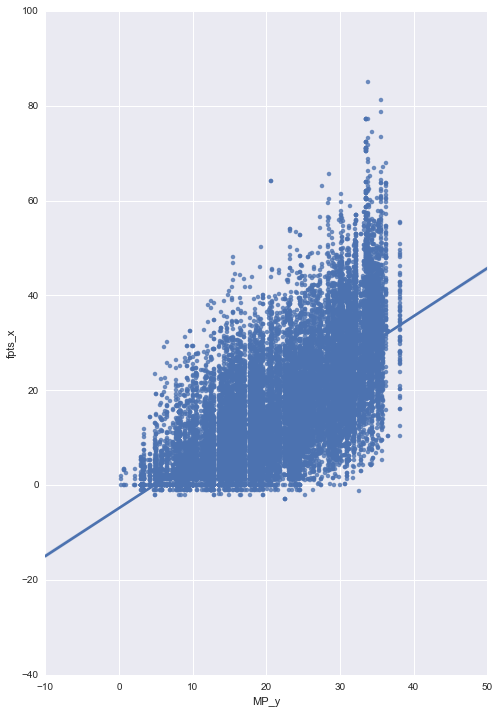

In [25]:
sns.pairplot(games, x_vars=['MP_y'], y_vars='fpts_x', size=10, aspect=0.7, kind='reg')

In [26]:
# TODO: create correlation matrix and other viz off gamesSimple = games[just specific data no college or opp dummies]
#gamesSimple = games

In [27]:
#sns.pairplot(gamesSimple)

In [28]:
#gamesSimple.corr()

In [ ]:
## TODO: Feature Selection

In [33]:
X = games.drop(['fpts_x'], axis=1)
y = games['fpts_x']

In [34]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print linreg.intercept_
print linreg.coef_

-2.36313946929
[ 0.02552844  0.25256686 -0.01720178  0.01811502  0.00738235  0.99907074
  0.27779993  0.71058896 -0.18490641  0.06201987  0.23106434 -0.5052849
  0.111655    0.47286424 -0.49041629 -0.46967076  0.88475463 -0.846837
 -0.77751356  0.88510902 -0.97992564 -1.01995674 -0.37830662  0.83589188
 -0.48341314  0.30611697  0.25656999 -0.04702009  1.53892793 -0.14284051
  0.71295844  1.13743137 -0.68046564  0.14416851 -0.70012929 -0.86123448
 -0.23413736 -0.20358932  0.01238482  0.03360412  0.16565976  0.21730096
  0.00877701 -0.19474419 -0.25680973  0.20657338  0.22716757 -0.28152402
  0.1193656   0.54735144  0.1070765   0.23033943 -0.11619126  0.23741797
  0.18756984  0.00930906  0.68082314  0.3732427  -0.11583866  0.22730401
 -0.09987926  0.0679368  -1.31405483  0.05958178 -0.09094491 -0.26830789
 -0.67712791  0.03443504  1.20259968 -0.67447048 -1.14828096 -0.22827768
 -0.31299165 -0.25133028  2.19640751 -0.17932233 -0.51679569 -0.06477144
 -0.03941124  0.32457052  0.11280289 -0

In [38]:
# TODO: get feature_cols list and run this
#zip(feature_cols, linreg.coef_)

In [40]:
from sklearn import metrics

In [41]:
y_pred = linreg.predict(X_test)

In [43]:
# this # is how far off your fpts prediction was from true fpts value
print metrics.mean_absolute_error(y_test, y_pred)

6.62721632634


In [45]:
# TODO: evaluate null model...
from sklearn.dummy import DummyRegressor

In [46]:
dumb = DummyRegressor(strategy='mean')
dumb.fit(X_train, y_train)
y_dumb_pred = dumb.predict(X_test)
print metrics.mean_absolute_error(y_test, y_dumb_pred)
# just taking the avg fpts and guessing gets you 10 pts off from real value vs. 6pts from model

10.2676440959


In [47]:
# Just completed Ordinary Least Squares (Linear) Regression

#TODO: run other regression models
# decision tree regressor
# random forest regressor
# knn regressor


In [ ]:
# TODO: Grid Search to refine on the best regression model